In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.ar_model import AutoReg

import warnings
warnings.filterwarnings("ignore")

In [8]:
df = pd.read_csv('./data/tovar_moving.csv', index_col='date', parse_dates=['date'], dayfirst=True)
df.head()

,qty
date,
2009-12-25,72314.0
2009-12-26,66586.0
2009-12-27,125199.0
2009-12-28,91544.0
2009-12-29,76995.0


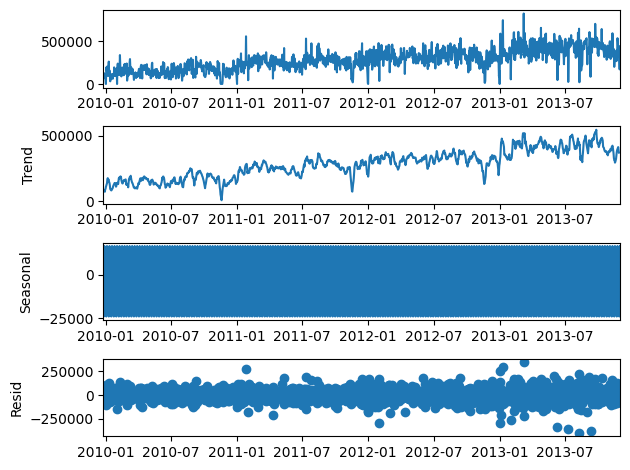

In [14]:
decomposition = seasonal_decompose(df, model='additive')
decomposition.plot()
plt.show()

In [25]:
# Тест стационарности исходного времянного ряда

def stat_test_stationary(data, p_value=0.05):
    statistic = adfuller(data)
    if statistic[1] > p_value:
        print("Ряд не стационарен")
    else:
        print("Ряд стационарен")


stat_test_stationary(df)


Ряд не стационарен


In [26]:
# Тест стационарности интегрированного временного ряда 1 порядка
stat_test_stationary(df_1 := df.diff().dropna())


Ряд стационарен


In [43]:
train_df = df.iloc[:-1]
test_df = df.iloc[-1:]

In [44]:
# Экспоненциальное сглаживание
ses = SimpleExpSmoothing(train_df)
alpha = 0.7
model = ses.fit(smoothing_level=alpha, optimized=False)
exp_pred = model.forecast(1)
exp_pred

2013-12-02    225015.522647
Freq: D, dtype: float64

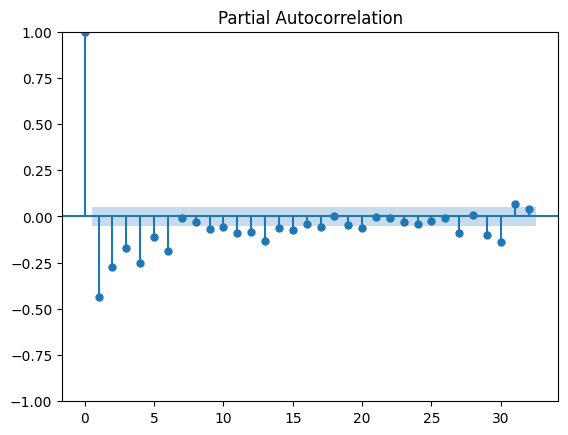

In [45]:
# Частичная автокорреляция
pacf_plot = plot_pacf(df_1)
plt.show()

In [46]:
p = 6

In [47]:
# Модель авторегрессии
ar_model = AutoReg(train_df, lags=p).fit()
print(ar_model.summary())

ar_pred = ar_model.predict(start=len(train_df), end=(len(train_df)), dynamic=False)
ar_pred

                            AutoReg Model Results                             
Dep. Variable:                    qty   No. Observations:                 1438
Model:                     AutoReg(6)   Log Likelihood              -18221.056
Method:               Conditional MLE   S.D. of innovations          81248.064
Date:                Wed, 02 Aug 2023   AIC                          36458.111
Time:                        12:58:52   BIC                          36500.246
Sample:                    12-31-2009   HQIC                         36473.844
                         - 12-01-2013                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.047e+04   6160.175      4.946      0.000    1.84e+04    4.25e+04
qty.L1         0.3074      0.026     11.654      0.000       0.256       0.359
qty.L2         0.1582      0.027      5.835      0.0

2013-12-02    318174.284553
Freq: D, dtype: float64

In [48]:
mean_squared_error(test_df, exp_pred)

39533558724.37031

In [49]:
mean_squared_error(test_df, ar_pred)

11166511445.473011